Load the libraries

In [55]:
import numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.datasets import cifar10

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Set The random seed

In [2]:
# Set random seed for purposes of reproducibility
seed = 21

Create training and test data from CIFAR 10

In [3]:
# loading in the data
     
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


Normalize the Data

In [7]:
 # normalize the inputs from 0-255 to between 0 and 1 by dividing by 255   
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

The Numpy command to_categorical() is used to one-hot encode. This is why we imported the np_utils function from Keras, as it contains to_categorical().

We also need to specify the number of classes that are in the dataset, so we know how many neurons to compress the final layer down to:

In [8]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

Aapply data augmentation to the same image several times:

In [63]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(32, 
                                                              32,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

Build the Model

In [70]:
model = Sequential()

model.add(data_augmentation)

model.add(Conv2D(8, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))


model.add(Dense(class_num))
model.add(Activation('softmax'))

Set the number of epochs and compile the model

In [72]:
epochs = 20
optimizer = 'adam'

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

We can print out the model summary to see what the whole model looks like.

In [73]:
print(model.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_15 (Sequential)   (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
activation_96 (Activation)   (None, 32, 32, 8)         0         
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 16, 16, 16)        1168      
_________________________________________________________________
activation_97 (Activation)   (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 16, 16, 16)      

Now we get to training the model. To do this, all we have to do is call the fit() function on the model and pass in the chosen parameters.

Here's where I use the seed I chose, for the purposes of reproducibility.

In [77]:
numpy.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

Epoch 1/20
782/782 [==============================] - 62s 80ms/step - loss: 1.1234 - accuracy: 0.5965 - val_loss: 1.0519 - val_accuracy: 0.6467
Epoch 2/20
782/782 [==============================] - 61s 78ms/step - loss: 1.1184 - accuracy: 0.5998 - val_loss: 1.0761 - val_accuracy: 0.6406
Epoch 3/20
782/782 [==============================] - 61s 78ms/step - loss: 1.1083 - accuracy: 0.6047 - val_loss: 1.0565 - val_accuracy: 0.6330
Epoch 4/20
782/782 [==============================] - 61s 78ms/step - loss: 1.0979 - accuracy: 0.6116 - val_loss: 1.0653 - val_accuracy: 0.6316
Epoch 5/20
782/782 [==============================] - 62s 80ms/step - loss: 1.1101 - accuracy: 0.6041 - val_loss: 1.0919 - val_accuracy: 0.6240
Epoch 6/20
782/782 [==============================] - 62s 79ms/step - loss: 1.0922 - accuracy: 0.6109 - val_loss: 1.0720 - val_accuracy: 0.6316
Epoch 7/20
782/782 [==============================] - 62s 79ms/step - loss: 1.0889 - accuracy: 0.6129 - val_loss: 1.0365 - val_accuracy:

In [78]:
# Model evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 64.45%


Visualize the results

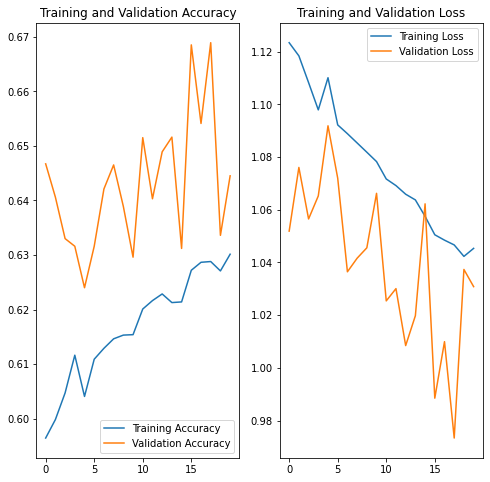

In [80]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()